## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from imblearn.over_sampling import SMOTE


from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay
from sklearn.model_selection import GridSearchCV


## Loading Data

In [4]:
data = pd.read_csv("C:/Users/soumy/Desktop/jobproject/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')


Number of rows: 7043
Number of columns: 21


In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data preprocessing

In [6]:
data.drop('customerID', axis=1, inplace= True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


SeniorCitizen column has an integer datatype and it is clearly a categorical variable, also the TotalCharges column has an object datatype and is a numerical feature, so I will convert them to correct datatypes.

In [8]:
print(data['SeniorCitizen'].unique())
print(data['TotalCharges'].nunique())

[0 1]
6531


In [9]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN) # This column had missing values represented by ' '. I noticed it when I tried converting it to float and it gave me an error that it could not convert string to float

In [11]:

data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median()) # I will fill the missing values with median

There are several features in our dataset like Online Security which has both No and No internet sercvice as a value. As this both values are essentially the same thing, I will convert it to one

In [12]:
for column in data.select_dtypes(include='object').columns:
    print(column, ":", data[column].unique())

gender : ['Female' 'Male']
SeniorCitizen : ['0' '1']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup', 
                                                                'DeviceProtection', 'TechSupport', 
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [14]:
for column in data.select_dtypes(include='object').columns:
    print(f'{column} : {list(data[column].unique())}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes']
OnlineBackup : ['Yes', 'No']
DeviceProtection : ['No', 'Yes']
TechSupport : ['No', 'Yes']
StreamingTV : ['No', 'Yes']
StreamingMovies : ['No', 'Yes']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [15]:
data['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [16]:
data['tenure'].value_counts(ascending= False)


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [17]:
# 0 appears 11 times, and minimum contract possible is a month-to-month contract, so I will count it as missing value and will fill it with median

In [18]:
data['tenure']  = data['tenure'].replace(0, np.NaN)
data['tenure'] = data['tenure'].fillna(data['tenure'].median())
data['tenure'].value_counts(ascending= False)

tenure
1.0     613
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
38.0     59
28.0     57
39.0     56
44.0     51
36.0     50
Name: count, Length: 72, dtype: int64

## EDA

In [19]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

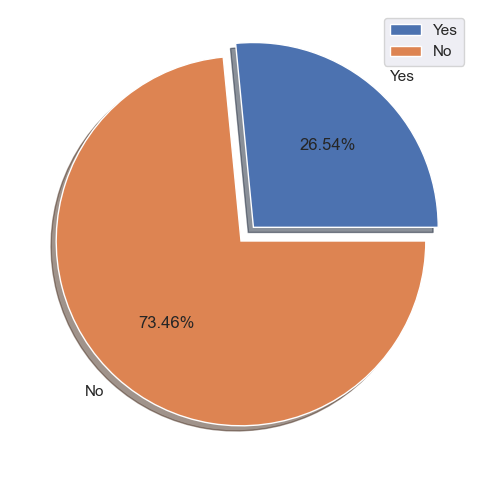

In [20]:
plt.figure(figsize= (10, 6))
data_pie  = [1869 , 5174]
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True)
plt.legend()
plt.show()

We clearly have a **imbalanced dataset**. Out of all the customers, 73.46% of people won't churn. 

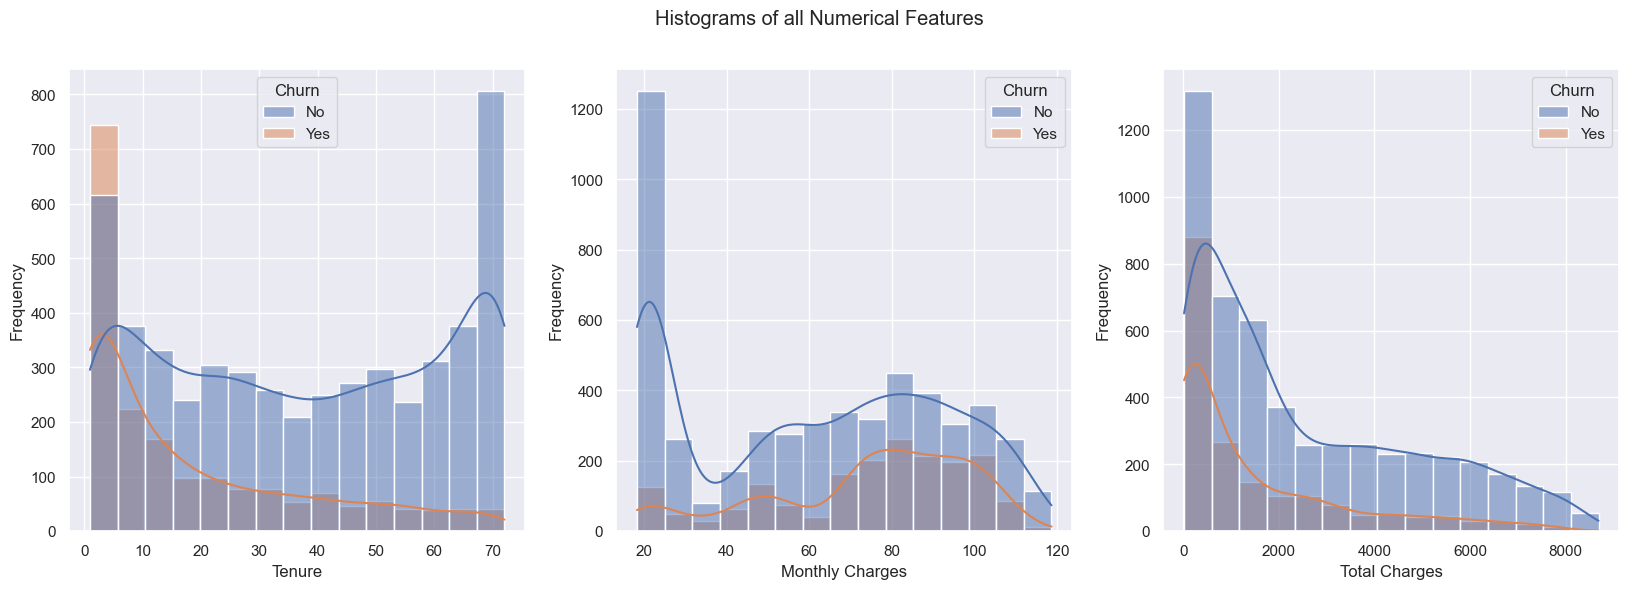

In [21]:
fig, ax  = plt.subplots(1, 3, figsize=(20,6))

plt.suptitle('Histograms of all Numerical Features')

ax1 = sns.histplot(x = data['tenure'],hue= data['Churn'], ax= ax[0], bins= 15, kde= True)
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = data['MonthlyCharges'],hue= data['Churn'], ax= ax[1], bins= 15, kde= True)
ax2.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax3 = sns.histplot(x = data['TotalCharges'], hue= data['Churn'], ax= ax[2], bins= 15, kde= True)
ax3.set(xlabel= 'Total Charges', ylabel= 'Frequency')

plt.show()

### Summary
- **Tenure**: New customers (low tenure) are more likely to churn. Long-term customers (high tenure) are less likely to churn.
- **Monthly Charges**: There is a higher churn rate among customers with both low and high monthly charges, though more pronounced for higher charges.
- **Total Charges**: Lower total charges are associated with higher churn, indicative of new customers leaving early. Customers with high total charges are typically long-term customers who do not churn.

The more months the customer stays with the company, the less likely it is that he/she will churn. 

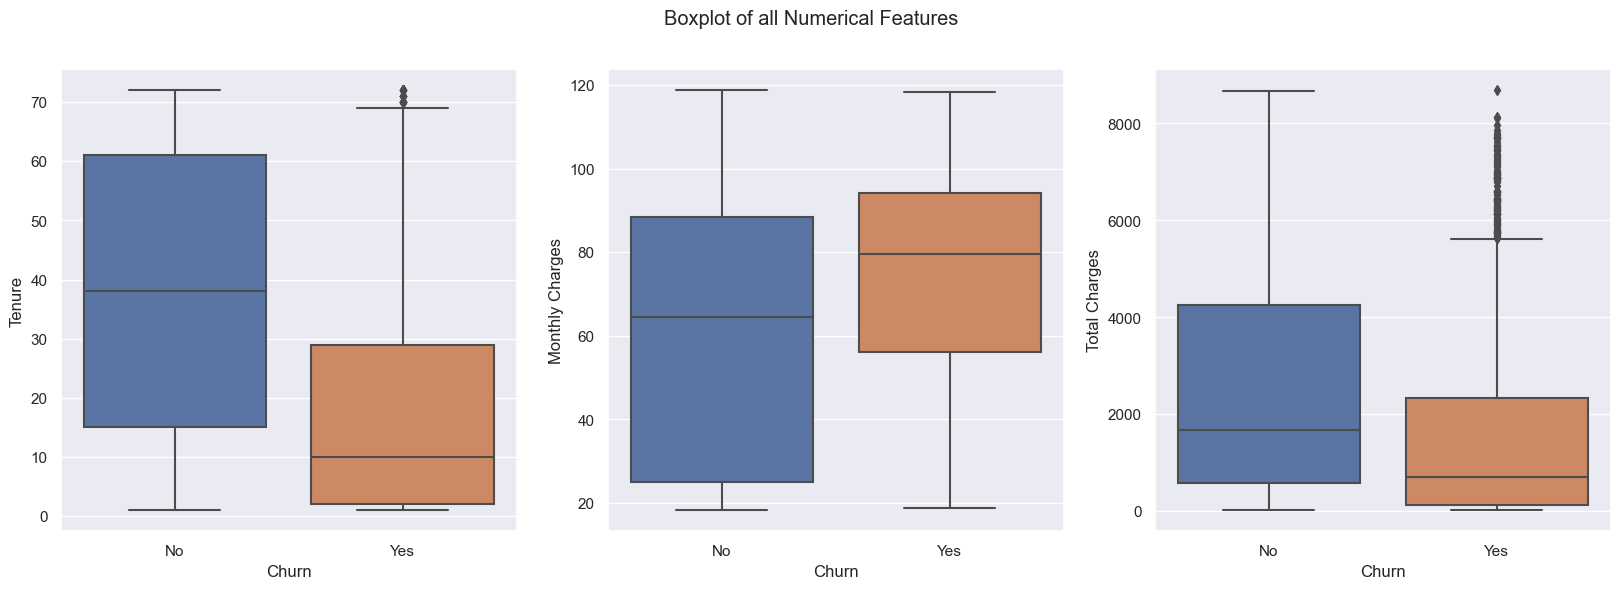

In [22]:
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))
plt.suptitle('Boxplot of all Numerical Features')

ax1 = sns.boxplot(y = data['tenure'], x= data['Churn'], ax= ax[0])
ax1.set(xlabel= 'Churn', ylabel= 'Tenure')

ax2 = sns.boxplot(y = data['MonthlyCharges'], x= data['Churn'], ax= ax[1])
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges')

ax3 = sns.boxplot(y = data['TotalCharges'], x= data['Churn'], ax= ax[2])
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges')

plt.show()

The box plots presented compare three numerical features (Tenure, Monthly Charges, and Total Charges) between customers who have churned ("Yes") and those who have not churned ("No"). Here are the inferences for each plot:

1. **Tenure:**
   - Customers who have not churned ("No") generally have a significantly longer tenure compared to those who have churned ("Yes").
   - The median tenure for non-churned customers is around 40 months, while for churned customers, it is about 10 months.
   - The interquartile range (IQR) for non-churned customers is larger, indicating more variability in tenure among this group.
   - There are fewer outliers in the churned group, indicating that most churned customers have relatively short tenures.

2. **Monthly Charges:**
   - The median monthly charge for churned customers is slightly higher than that for non-churned customers.
   - The interquartile ranges (IQRs) are somewhat similar, but non-churned customers have a wider overall range of monthly charges.
   - This could imply that customers with higher monthly charges are slightly more likely to churn, although the difference is not substantial.

3. **Total Charges:**
   - Non-churned customers have significantly higher total charges compared to churned customers.
   - The median total charge for non-churned customers is approximately 4000, while for churned customers, it is around 1000.
   - The distribution of total charges for churned customers has many outliers, suggesting that while most churned customers have lower total charges, there are a few with very high total charges.
   - This indicates that customers who have been with the company longer (as indicated by higher total charges) are less likely to churn.

### General Inferences:
- **Tenure** is a strong indicator of churn, with customers having a shorter tenure being more likely to churn.
- **Monthly Charges** show a slight tendency for higher charges to correlate with churn, but this is not as pronounced.
- **Total Charges** strongly correlate with churn, suggesting that long-term customers who have accumulated higher charges over time are less likely to churn.


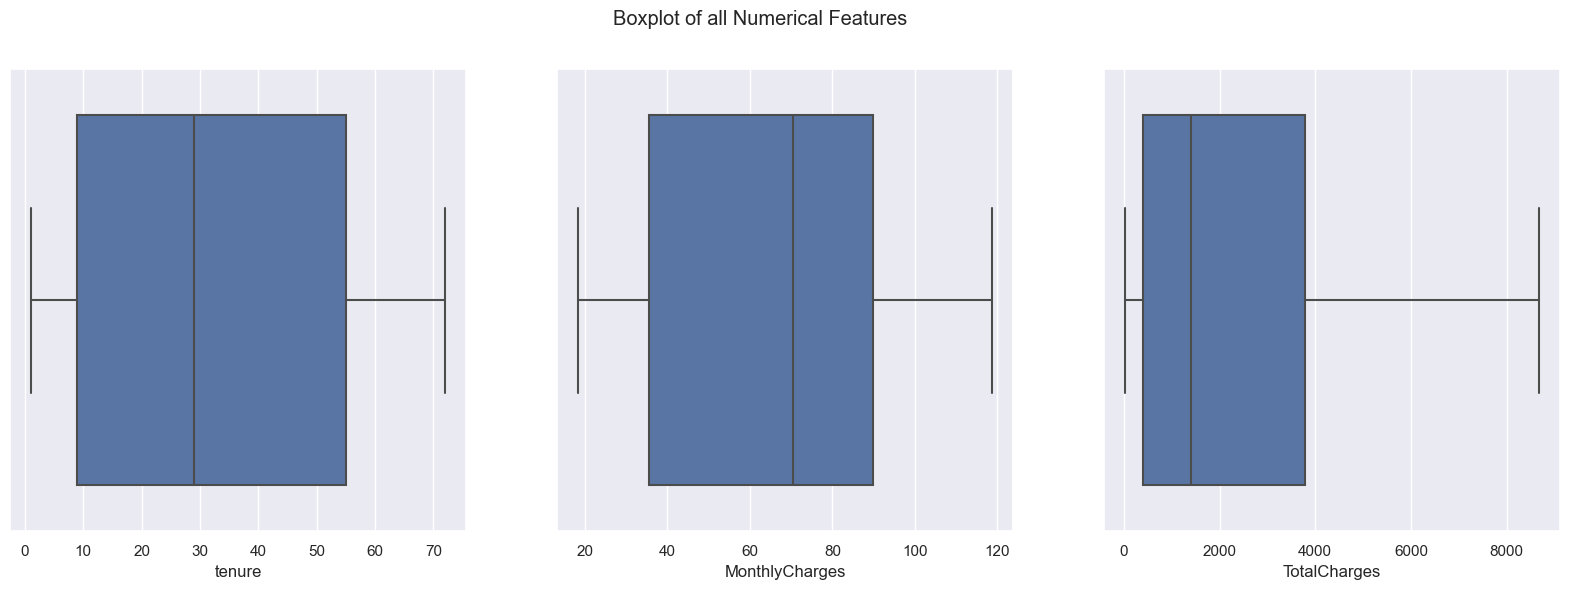

In [23]:
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))
plt.suptitle('Boxplot of all Numerical Features')

ax1 = sns.boxplot(x = data['tenure'], ax= ax[0])

ax2 = sns.boxplot(x = data['MonthlyCharges'], ax= ax[1])

ax3 = sns.boxplot(x = data['TotalCharges'], ax= ax[2])

plt.show()

There are no outliers in these features.

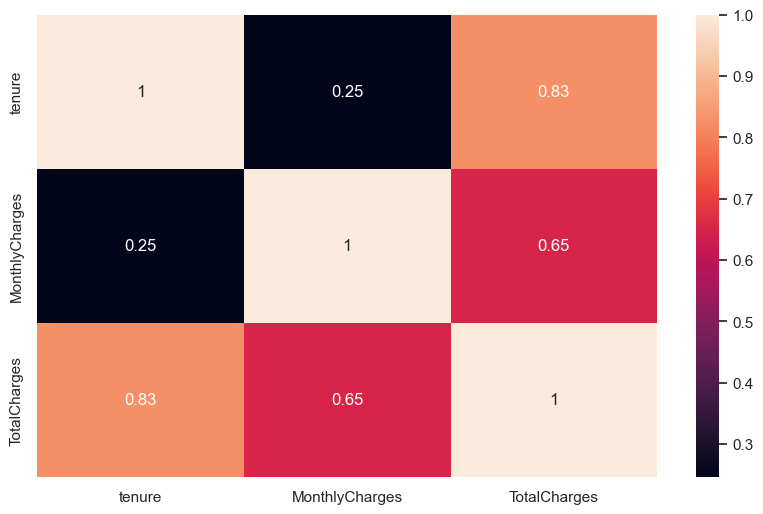

In [24]:
numeric_data = data.select_dtypes(include=['int', 'float']) #number

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

### Correlations:
- *Tenure and Total Charges:*
  - Strong correlation between them.
- *Monthly and Total Charges:*
  - Correlation between them is significant suggesting that customers who pay more each month tend to accumulate higher total charges more quickly .



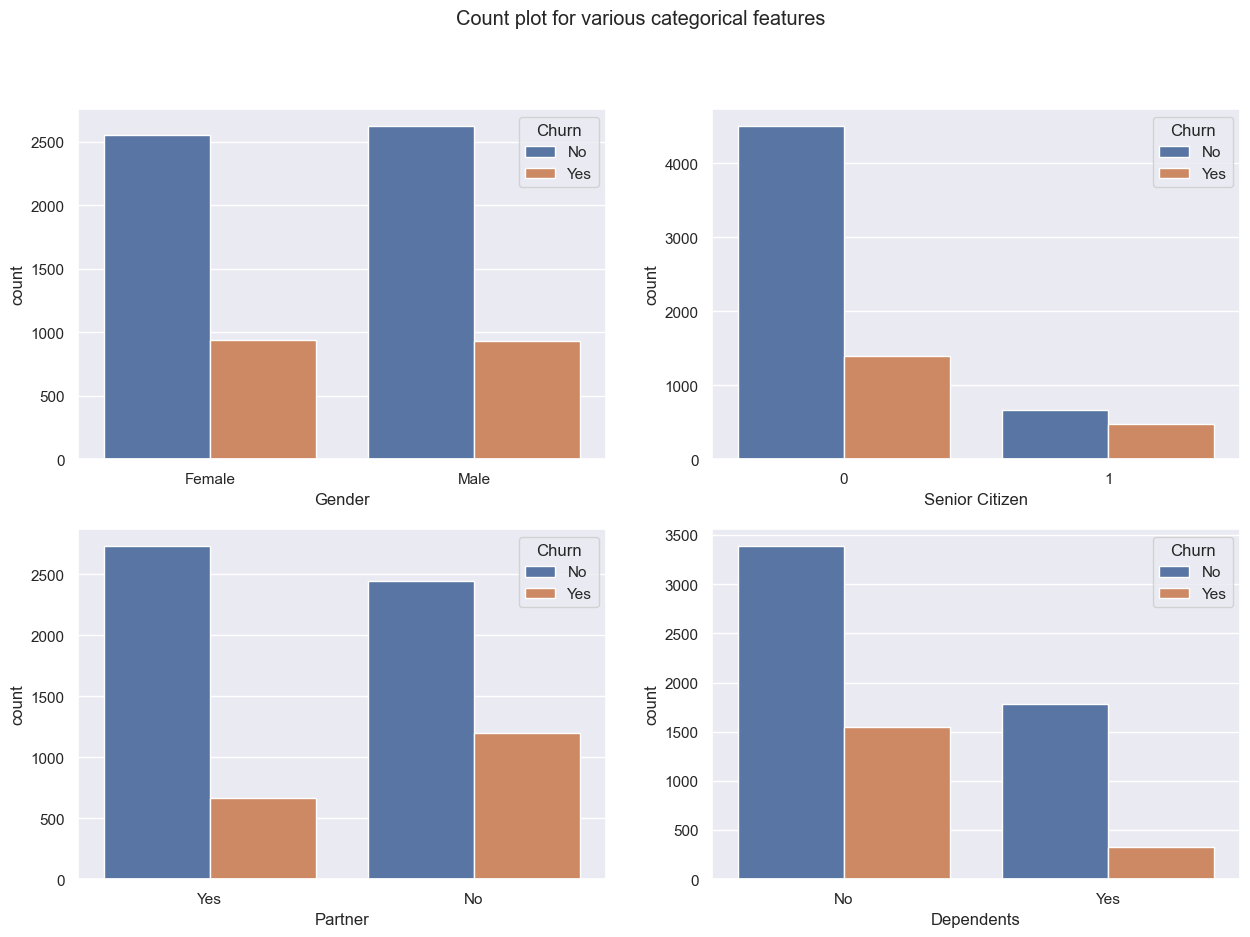

In [25]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
plt.suptitle('Count plot for various categorical features')

ax1 = sns.countplot(x ='gender', data= data, hue= 'Churn', ax= ax[0, 0])
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= data, hue= 'Churn', ax= ax[0, 1])
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= data, hue= 'Churn', ax= ax[1, 0])
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= data, hue= 'Churn', ax= ax[1, 1])
ax4.set(xlabel = 'Dependents')

plt.show()

Based on the demographic information, it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning as compared to customers who do have a partner.
Also,customers not having a dependent have higher chances of churning as compared to customers who do have a dependent.

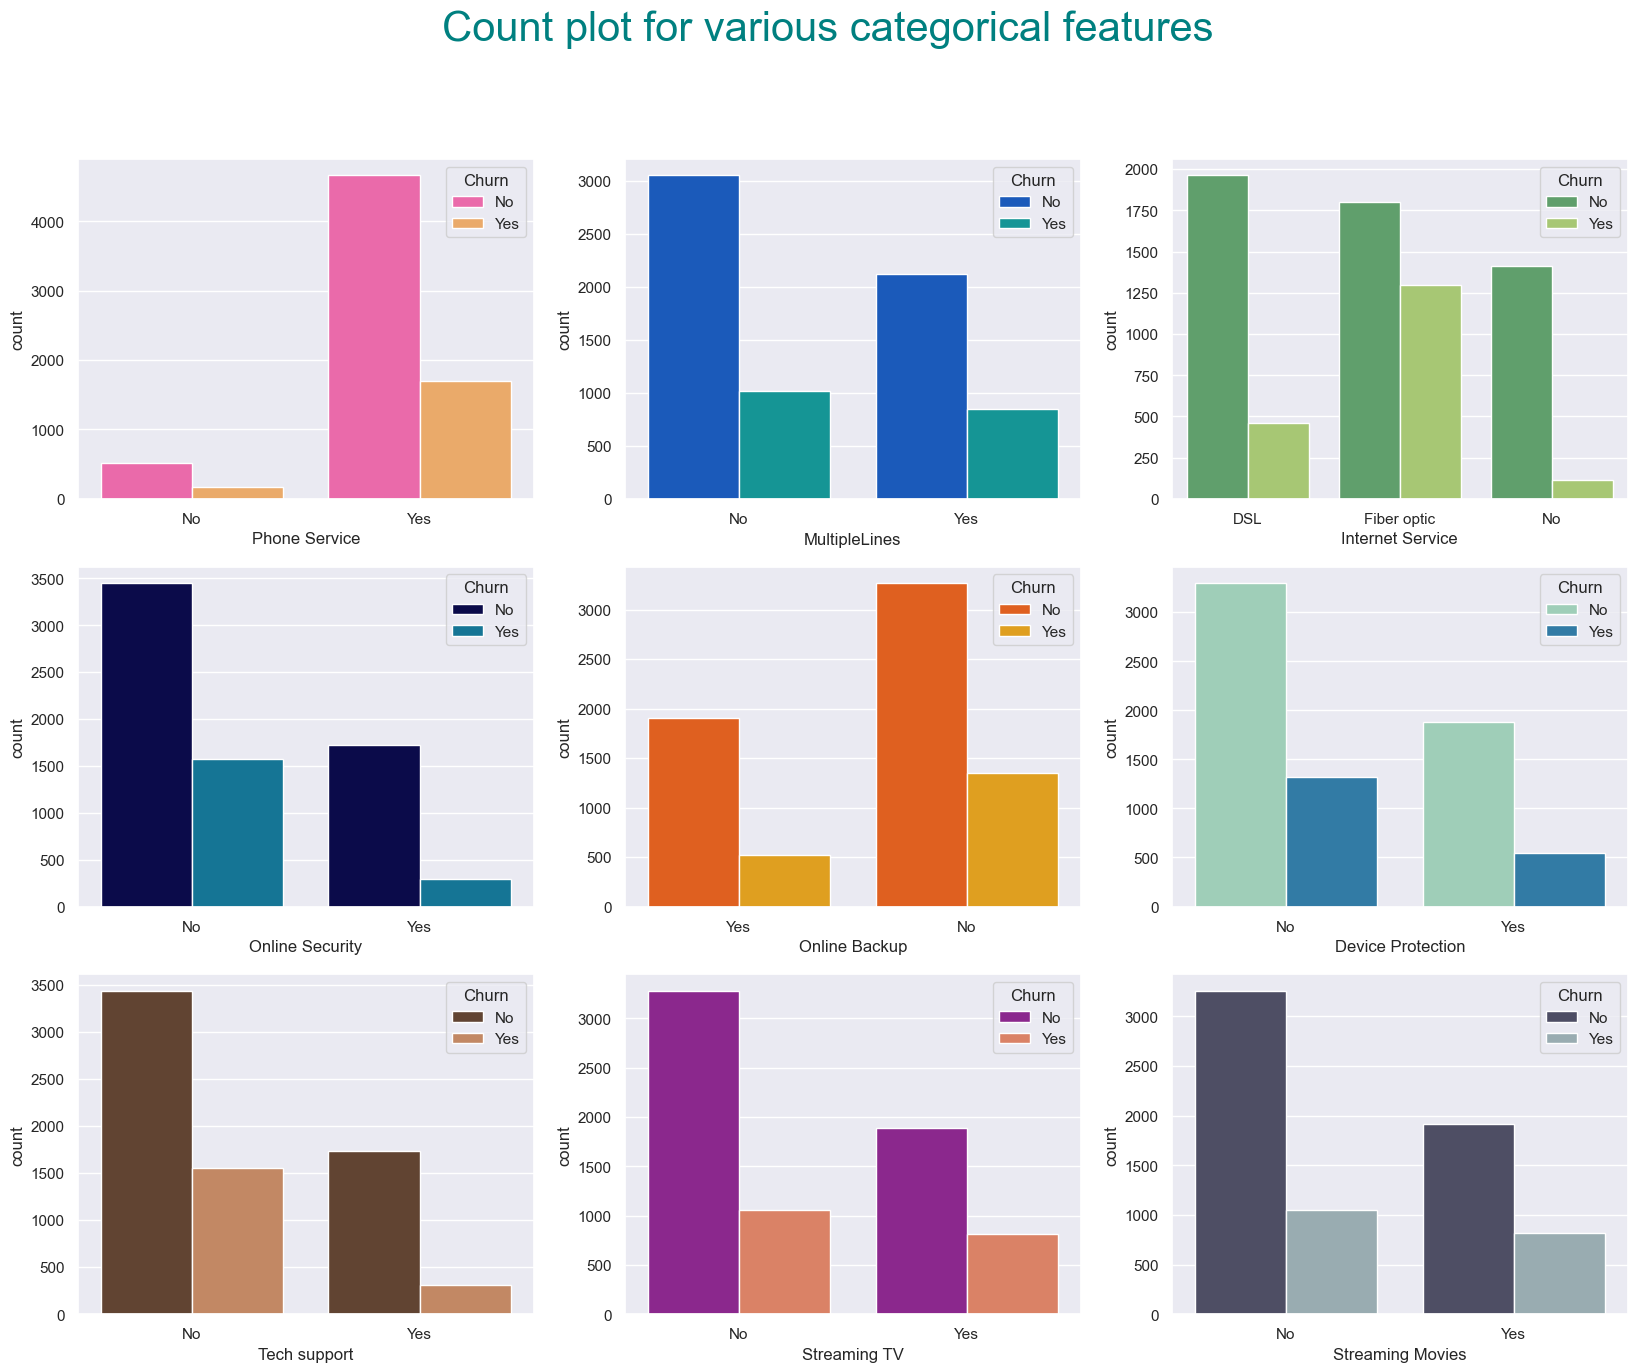

In [26]:
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= data, hue= 'Churn', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'ocean')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= data, hue= 'Churn', ax= ax[1, 1], palette= 'autumn')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= data, hue= 'Churn', ax= ax[1, 2], palette= 'YlGnBu')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= data, hue= 'Churn', ax= ax[2, 0], palette= 'copper')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= data, hue= 'Churn', ax= ax[2, 1], palette= 'plasma')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= data, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

plt.show()

The inferences based on the count plots for various categorical features are:

The count plots illustrate the relationship between customer churn and various services:

1. **Phone Service**:
   - Higher churn for customers with phone service.

2. **Multiple Lines**:
   - Higher churn for customers with multiple lines.

3. **Internet Service**:
   - Higher churn for fiber optic internet service users compared to DSL users.

4. **Online Security**:
   - Higher churn for customers without online security.

5. **Online Backup**:
   - Higher churn for customers without online backup.

6. **Device Protection**:
   - Higher churn for customers without device protection.

7. **Tech Support**:
   - Higher churn for customers without tech support.

8. **Streaming TV**:
   - Higher churn for customers with streaming TV.

9. **Streaming Movies**:
   - Higher churn for customers with streaming movies.

In summary, customers without online security, online backup, device protection, and tech support are more likely to churn. Additionally, customers with phone service, multiple lines, fiber optic internet, streaming TV, and streaming movies also show higher churn rates.


In [27]:
data['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

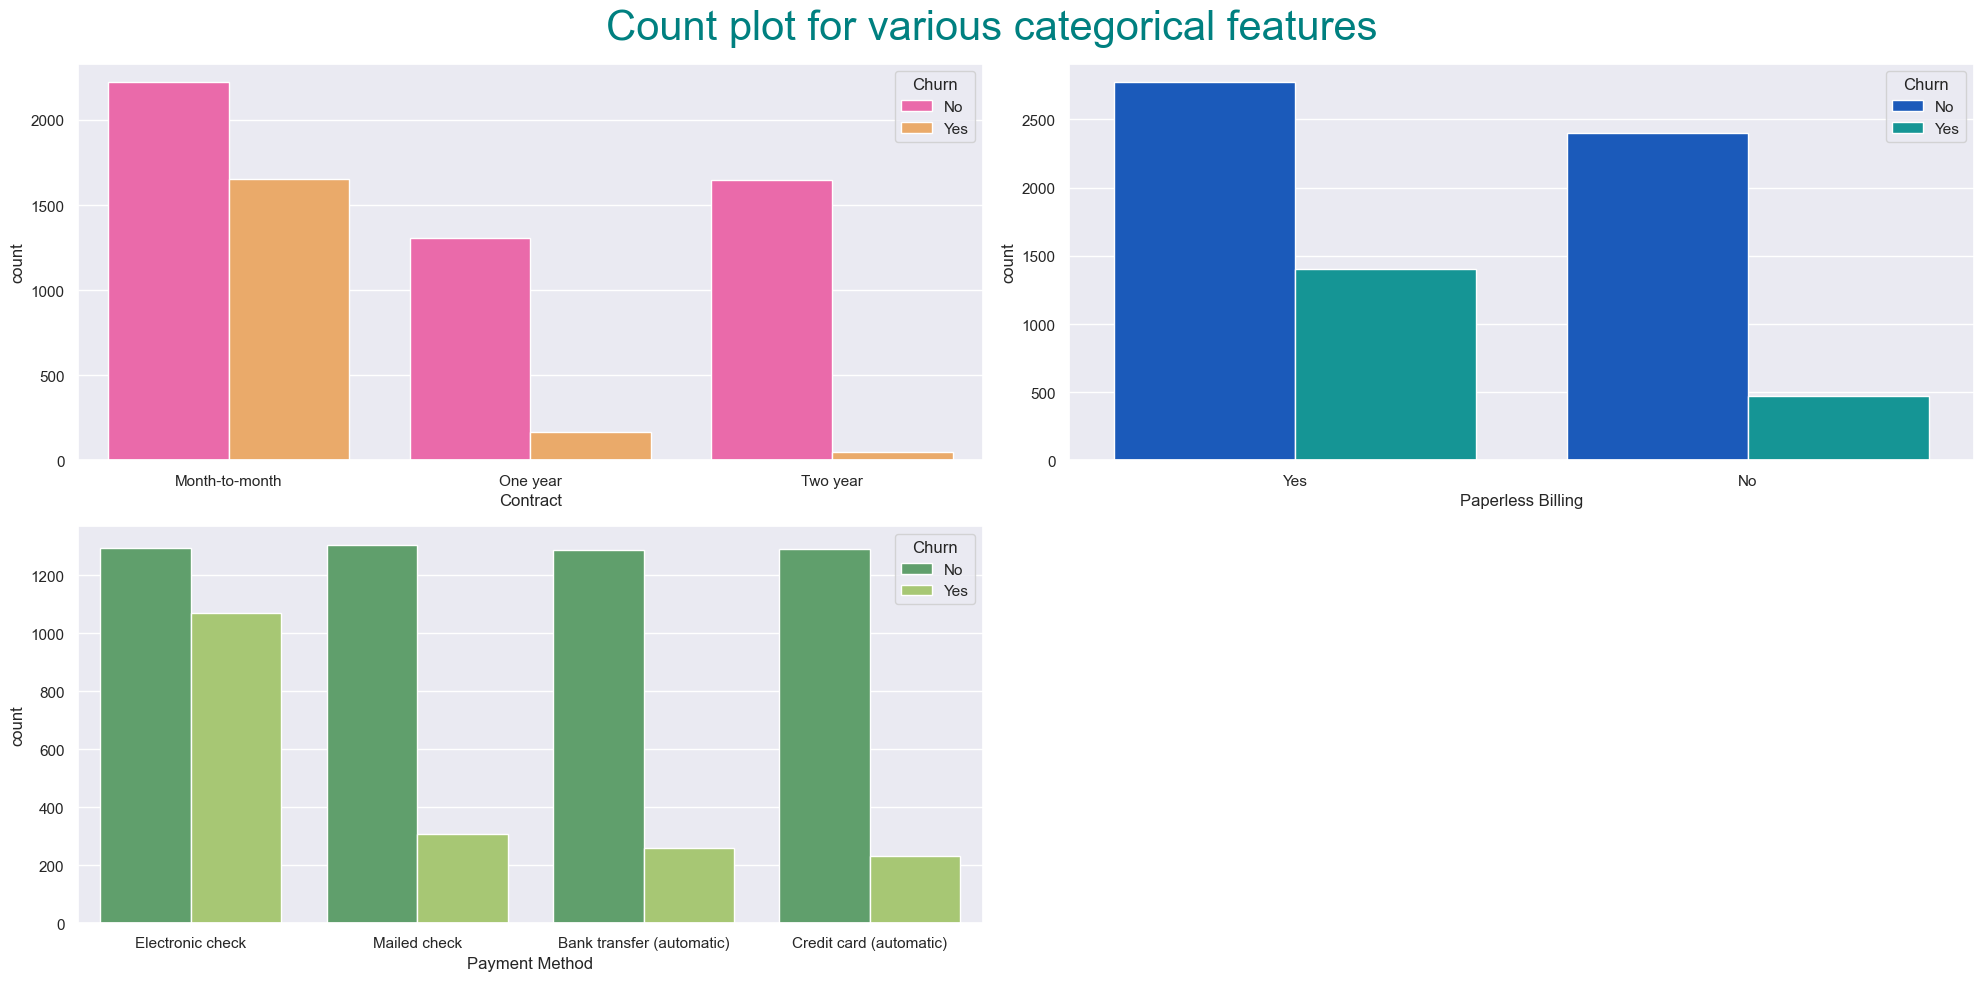

In [28]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off') 

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='Contract', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

1. **Contract Type**:
   - **Month-to-month** contracts have a higher churn rate, with significantly more customers who churn compared to those who stay.
   - **One-year** and **two-year** contracts have lower churn rates, with many more customers staying than churning, especially noticeable in two-year contracts.

2. **Paperless Billing**:
   - Customers with **paperless billing** show a higher churn rate compared to those without it.
   - Those not using paperless billing tend to stay more than churn.

3. **Payment Method**:
   - **Electronic check** users have a higher churn rate compared to other payment methods.
   - **Mailed check**, **bank transfer (automatic)**, and **credit card (automatic)** methods show lower churn rates, with more customers staying than churning.
   

## Missing Values

In [29]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Fortunately, there are no missing values in this dataset

## Checking for skewness

In [30]:
numeric_data = data.select_dtypes(include=['int', 'float']).columns
skew_df = pd.DataFrame({
    'Feature': numeric_data,
    'Skew': [skew(data[feature]) for feature in numeric_data],
    })
skew_df['Absolute Skew'] = skew_df['Skew'].abs()



In [31]:
skew_df

,Feature,Skew,Absolute Skew
0,tenure,0.238505,0.238505
1,MonthlyCharges,-0.220477,0.220477
2,TotalCharges,0.963584,0.963584


Total Charges column is clearly skewed as we also saw in the histogram, so lets apply log transformation to it

In [32]:
data['TotalCharges'] = np.log(data['TotalCharges'])

## Encoding

In this dataset, we have lots of categorical columns and some follow a certain order. So we will need to apply different kinds of encoding to different categorical features.

Binary Encoding

In [33]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for column in binary_columns:
    data[column] = le.fit_transform(data[column])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,3.396185,0
1,1,0,0,0,34.0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,7.544068,0
2,1,0,0,0,2.0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,4.683519,1
3,1,0,0,0,45.0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,7.517928,0
4,0,0,0,0,2.0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,5.021575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,7.596141,0
7039,0,0,1,1,72.0,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,8.904209,0
7040,0,0,1,1,11.0,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,5.847739,0
7041,1,1,1,0,4.0,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,5.725544,1


One Hot Encoding

In [34]:
dummies_payment = pd.get_dummies(data['PaymentMethod'], drop_first= True).astype(int)
data = pd.concat([data, dummies_payment], axis=1)
data.drop('PaymentMethod',axis =1 , inplace= True)

In [35]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1.0,0,0,DSL,0,1,...,0,0,Month-to-month,1,29.85,3.396185,0,0,1,0
1,1,0,0,0,34.0,1,0,DSL,1,0,...,0,0,One year,0,56.95,7.544068,0,0,0,1
2,1,0,0,0,2.0,1,0,DSL,1,1,...,0,0,Month-to-month,1,53.85,4.683519,1,0,0,1
3,1,0,0,0,45.0,0,0,DSL,1,0,...,0,0,One year,0,42.30,7.517928,0,0,0,0
4,0,0,0,0,2.0,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,70.70,5.021575,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,1,DSL,1,0,...,1,1,One year,1,84.80,7.596141,0,0,0,1
7039,0,0,1,1,72.0,1,1,Fiber optic,0,1,...,1,1,One year,1,103.20,8.904209,0,1,0,0
7040,0,0,1,1,11.0,0,0,DSL,1,0,...,0,0,Month-to-month,1,29.60,5.847739,0,0,1,0
7041,1,1,1,0,4.0,1,1,Fiber optic,0,0,...,0,0,Month-to-month,1,74.40,5.725544,1,0,0,1


Ordinal Encoding

In [36]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

data['InternetService'] = data['InternetService'].apply(lambda x: internet_ordering.index(x))
data['Contract'] = data['Contract'].apply(lambda x: contract_ordering.index(x))

## Scaling

In [37]:
X = data.drop('Churn', axis= 1)
y = data['Churn']


In [38]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state= 101,stratify=y) 

In [40]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return accuracy, precision, recall, f1, roc_auc

In [41]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(), 
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    accuracy, precision, recall, f1, roc_auc=evaluate_model(y_test, y_test_pred)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

In [42]:
regression_metrics_df=pd.DataFrame({
    "Model": ["Logistic Regression",
"Random Forest Classifier",
"Decision Tree Classifier",
"K-Neighbors Classifier"
],
    "Accuracy":accuracy_list ,
    "Precision":precision_list ,
    "Recall":recall_list ,
    "F1 Score":f1_list ,
    "ROC AUC Score":roc_auc_list
})
regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model,,,,,
Logistic Regression,0.797019,0.643791,0.526738,0.579412,0.710712
Random Forest Classifier,0.782115,0.614334,0.481283,0.539730,0.686052
Decision Tree Classifier,0.711852,0.460000,0.491979,0.475452,0.641641
K-Neighbors Classifier,0.760114,0.555215,0.483957,0.517143,0.671930


As you can see that the accuracy is quite low, and as it's an **imbalanced dataset**, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets. Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers. Hence, moving ahead to call **SMOTE** .

In [43]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X,y)
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [44]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(), 
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier()
}

model_list2 = []
accuracy_list2 = []
precision_list2 = []
recall_list2 = []
f1_list2 = []
roc_auc_list2 = []

for model_name, model in models.items():
    model.fit(Xr_train, yr_train) # Train model

    # Make predictions
    yr_train_pred = model.predict(Xr_train)
    yr_test_pred = model.predict(Xr_test)
    
    # Evaluate Train and Test dataset
    accuracy, precision, recall, f1, roc_auc=evaluate_model(yr_test, yr_test_pred)
    accuracy_list2.append(accuracy)
    precision_list2.append(precision)
    recall_list2.append(recall)
    f1_list2.append(f1)
    roc_auc_list2.append(roc_auc)

In [45]:
metrics_df=pd.DataFrame({
    "Model": ["Logistic Regression",
"Random Forest Classifier",
"Decision Tree Classifier",
"K-Neighbors Classifier"
],
    "Accuracy":accuracy_list2 ,
    "Precision":precision_list2 ,
    "Recall":recall_list2 ,
    "F1 Score":f1_list2 ,
    "ROC AUC Score":roc_auc_list2
})
metrics_df.set_index('Model', inplace=True)
metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model,,,,,
Logistic Regression,0.790338,0.757273,0.833,0.793333,0.791734
Random Forest Classifier,0.853623,0.837367,0.865,0.850959,0.853995
Decision Tree Classifier,0.797101,0.787698,0.794,0.790837,0.797000
K-Neighbors Classifier,0.781159,0.714847,0.910,0.800704,0.785374


## Model Performance Evaluation & Performance Curve

---> Logistic Regression :

 Confusion Matrix 



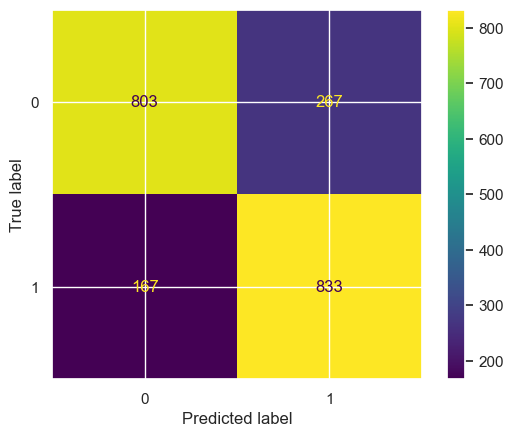


 Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1070
           1       0.76      0.83      0.79      1000

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



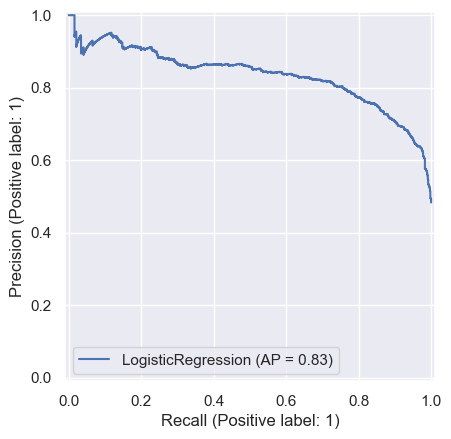

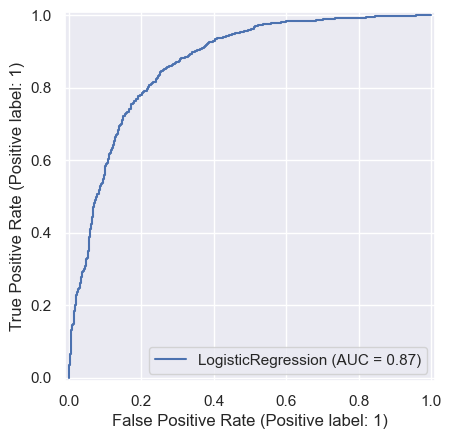

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
---> Random Forest Classifier :

 Confusion Matrix 



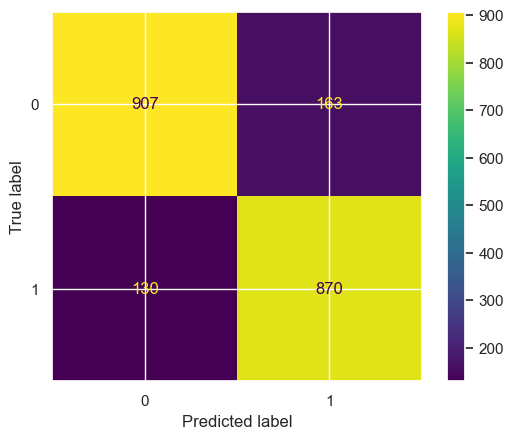


 Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1070
           1       0.84      0.87      0.86      1000

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



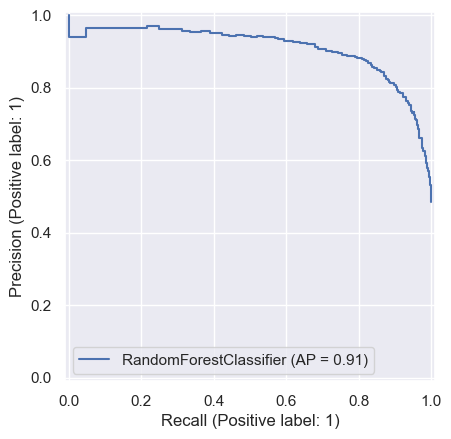

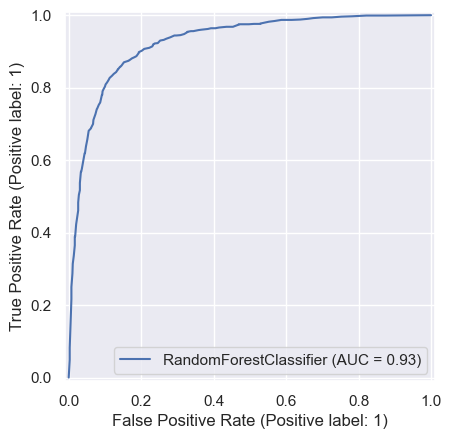

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
---> Decision Tree Classifier :

 Confusion Matrix 



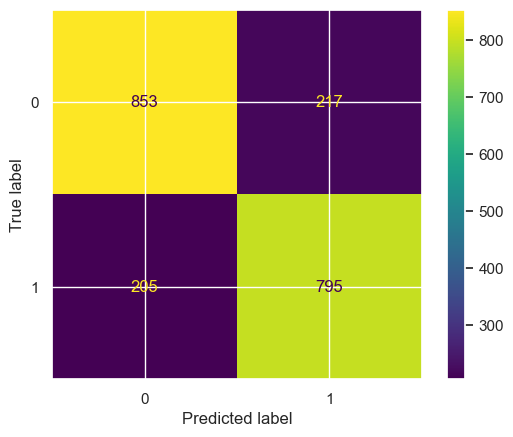


 Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1070
           1       0.79      0.80      0.79      1000

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



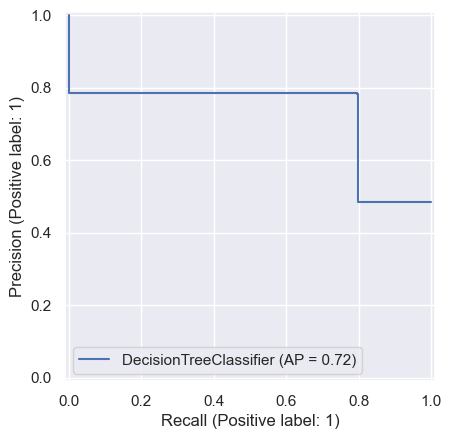

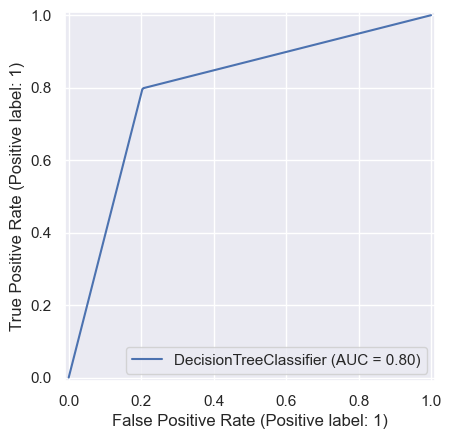

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
---> K-Neighbors Classifier :

 Confusion Matrix 



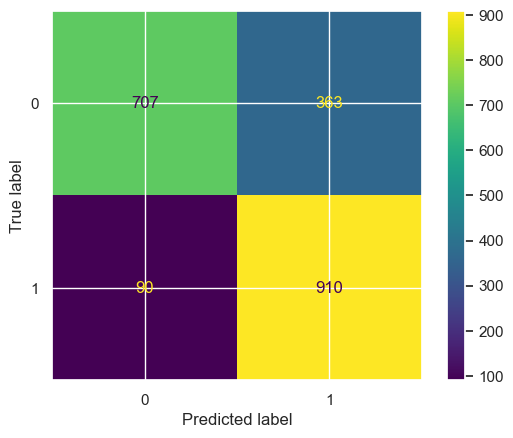


 Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1070
           1       0.71      0.91      0.80      1000

    accuracy                           0.78      2070
   macro avg       0.80      0.79      0.78      2070
weighted avg       0.80      0.78      0.78      2070



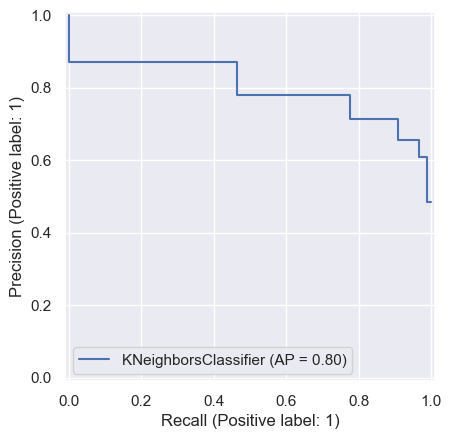

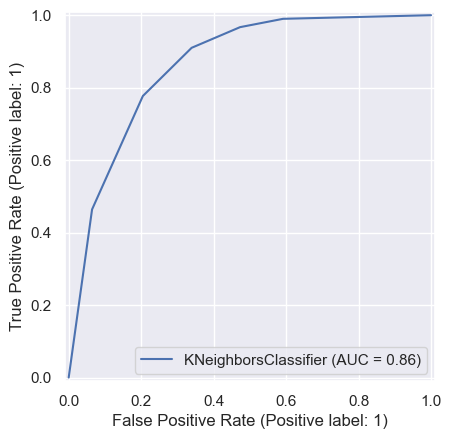

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------


In [46]:
for model_name, model in models.items():
    print("--->",model_name,':')
   
    model.fit(Xr_train, yr_train) # Train model

    # Make predictions
    yr_train_pred = model.predict(Xr_train)
    yr_test_pred = model.predict(Xr_test)
    
    print("\n Confusion Matrix \n")
    confusion_matrix(yr_test, yr_test_pred)
    cm = confusion_matrix(yr_test, yr_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    print("\n Classification Report \n")
    print(classification_report(yr_test, yr_test_pred))
    PrecisionRecallDisplay.from_estimator(estimator=model, X= Xr_test, y=yr_test)
    RocCurveDisplay.from_estimator(estimator=model, X=Xr_test, y=yr_test)
    plt.show()
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")

## CONCLUSION

After comparing the models using metrics such as accuracy, precision, recall, f1 score, roc-auc curve and precision-recall curve we can finally conclude that **Random Forest Classifier** is the best amongst the models.

Using this model, we can predict whether the predicted churned customer will churn with a precision of 84%.
The recall of 0.86 is the probability of finding an authentic churn from the customer base.

In [48]:
# Dictionary containing models and their respective parameters for Grid Search
model_params = {
    "Logistic Regression": {
        'model': LogisticRegression(),
        'params': {
            'C': [0.25, 0.5, 0.75, 1],
        }
    },
    "Random Forest Classifier": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 150, 200],
            'criterion': ['gini', 'entropy'],
        }
    },
    "Decision Tree Classifier": {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
        }
    },
    "K-Neighbors Classifier": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 7, 8, 10],
            'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
        }
    }
}  # Removed the extra closing brace here

# List to store metrics
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Iterate through each model and perform Grid Search
for model_name, mp in model_params.items():
    model = mp['model']
    params = mp['params']
    
    # Perform Grid Search with cross-validation (5-fold)
    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(Xr_train, yr_train)
    
    # Select the best model found by Grid Search
    best_model = grid_search.best_estimator_

    # Make predictions
    yr_train_pred = best_model.predict(Xr_train)
    yr_test_pred = best_model.predict(Xr_test)
    
    # Evaluate Train and Test dataset
    accuracy, precision, recall, f1, roc_auc = evaluate_model(yr_test, yr_test_pred)
    
    # Append metrics to lists
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

# Create a DataFrame to display metrics
metrics_df1 = pd.DataFrame({
    "Model": model_list,
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list,
    "ROC AUC Score": roc_auc_list
})

metrics_df1.set_index('Model', inplace=True)
metrics_df1


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model,,,,,
Logistic Regression,0.790338,0.757273,0.833,0.793333,0.791734
Random Forest Classifier,0.858454,0.840887,0.872,0.856161,0.858897
Decision Tree Classifier,0.788889,0.771981,0.799,0.785258,0.789220
K-Neighbors Classifier,0.801932,0.748316,0.889,0.812614,0.804780


---> Logistic Regression :

 Confusion Matrix 



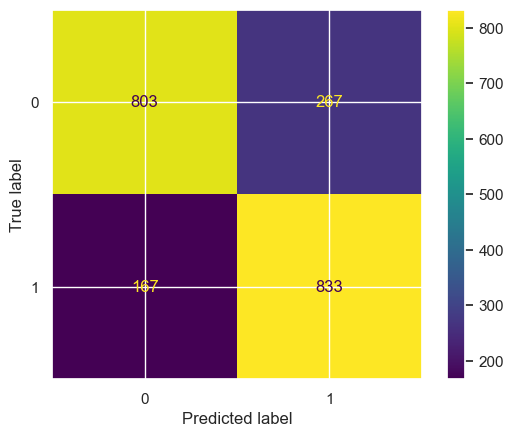


 Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1070
           1       0.76      0.83      0.79      1000

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



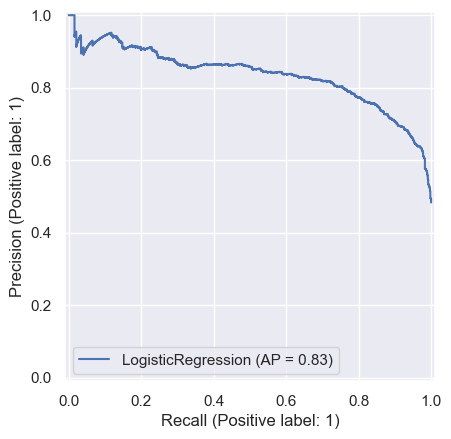

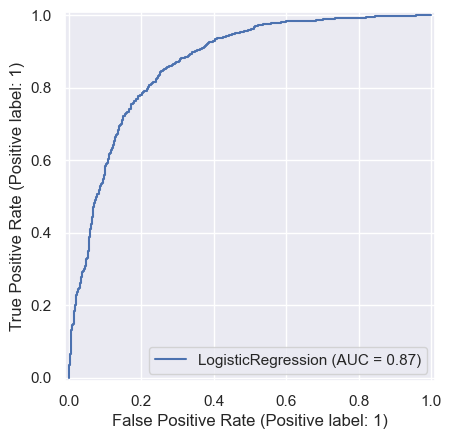

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
---> Random Forest Classifier :

 Confusion Matrix 



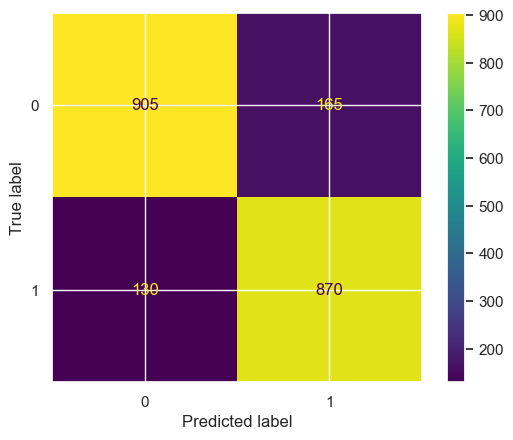


 Classification Report 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1070
           1       0.84      0.87      0.86      1000

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



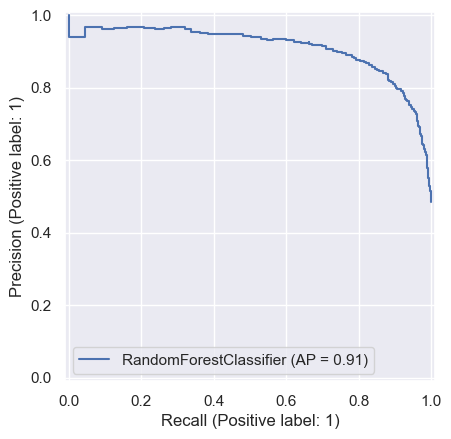

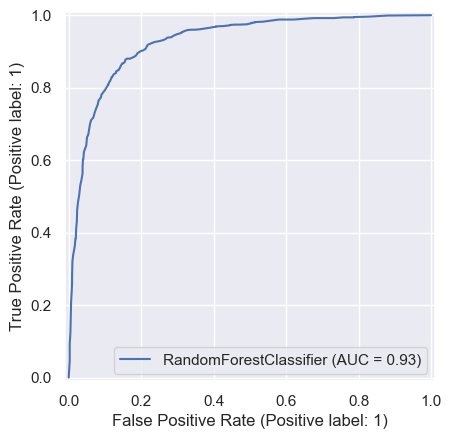

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
---> Decision Tree Classifier :

 Confusion Matrix 



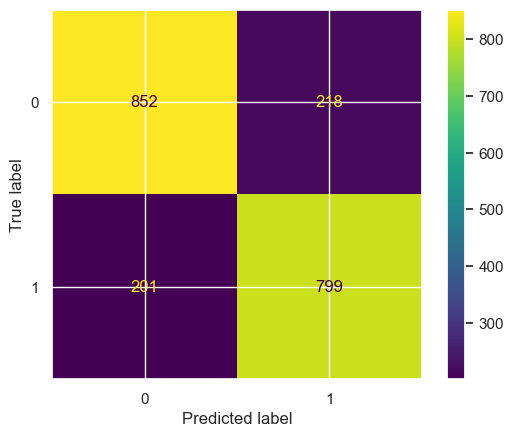


 Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1070
           1       0.79      0.80      0.79      1000

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



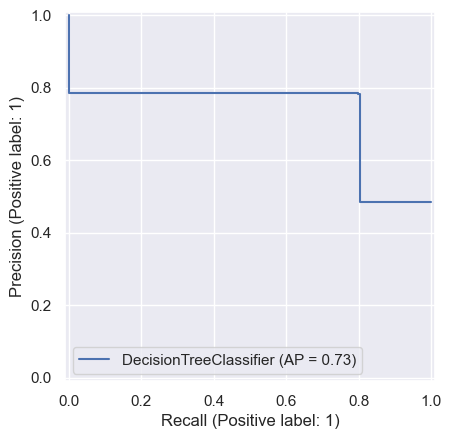

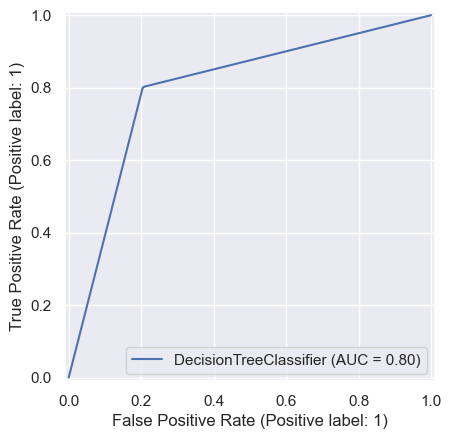

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
---> K-Neighbors Classifier :

 Confusion Matrix 



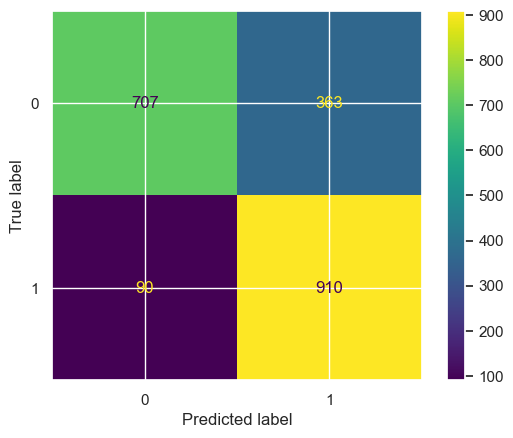


 Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1070
           1       0.71      0.91      0.80      1000

    accuracy                           0.78      2070
   macro avg       0.80      0.79      0.78      2070
weighted avg       0.80      0.78      0.78      2070



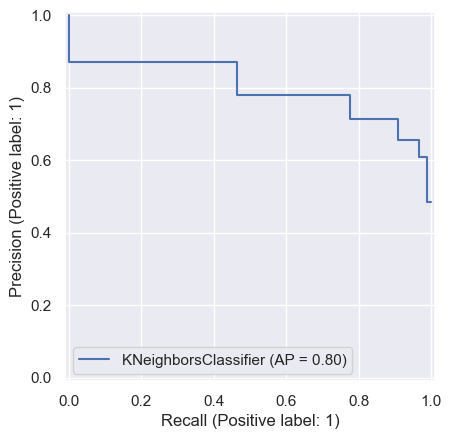

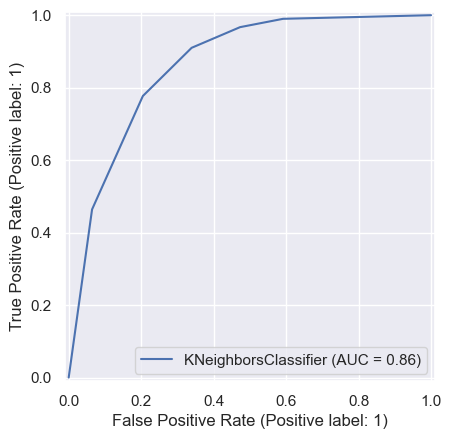

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------


In [49]:
for model_name, model in models.items():
    print("--->",model_name,':')
   
    model.fit(Xr_train, yr_train) # Train model

    # Make predictions
    yr_train_pred = model.predict(Xr_train)
    yr_test_pred = model.predict(Xr_test)
    
    print("\n Confusion Matrix \n")
    confusion_matrix(yr_test, yr_test_pred)
    cm = confusion_matrix(yr_test, yr_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    print("\n Classification Report \n")
    print(classification_report(yr_test, yr_test_pred))
    PrecisionRecallDisplay.from_estimator(estimator=model, X= Xr_test, y=yr_test)
    RocCurveDisplay.from_estimator(estimator=model, X=Xr_test, y=yr_test)
    plt.show()
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")